In [1]:
pip install numpy opencv-python scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import joblib 
import matplotlib.pyplot as plt

In [3]:
data_dir = 'C:/Users/sunny/Downloads/dogs-vs-cats/train'  # Update with the path to your dataset
image_size = (64, 64, 3)

In [8]:
def load_dataset():
    images = []
    labels = []

    for file in os.listdir(data_dir):
        if file.endswith(".jpg"):
            image_path = os.path.join(data_dir, file)
            label = 1 if "dog" in file else 0  # 1 for dog, 0 for cat

            # Read image
            image = cv2.imread(image_path)
            
            # Resize image
            image = cv2.resize(image, (image_size[1], image_size[0]))  # (width, height)

            # If images are in BGR format, you may need to convert them to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)

In [9]:
# Load and preprocess the dataset
images, labels = load_dataset()

In [13]:
# Reshape the images to 2D arrays
images_2d = images.reshape(images.shape[0], -1)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_2d, labels, test_size=0.2, random_state=42)

In [15]:
# Create an SVM model with PCA for dimensionality reduction
svm_model = make_pipeline(StandardScaler(), PCA(n_components=100), SVC())

In [16]:
# Train the SVM model
svm_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=100)), ('svc', SVC())])

In [18]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6742


In [20]:
# Save the trained model
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

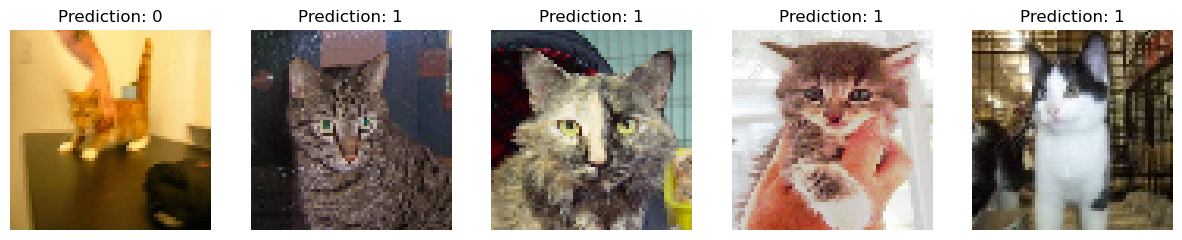

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f'Prediction: {y_pred[i]}')
    ax.axis('off')

plt.show()